<a href="https://colab.research.google.com/github/saks625/new-octo-train/blob/main/creditcardfraud_detection_codsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from IPython.display import Image
Image(url= "https://staysafe.org/wp-content/uploads/2018/01/credit-card-3.jpg")


In [ ]:
import os

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
Credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
Credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
Credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27814,34711,1.443955,-1.052462,-0.141721,-1.564017,-0.966274,-0.333886,-0.777060,0.023616,-2.168826,...,-0.479940,-1.165220,0.155226,-0.409701,0.179672,-0.446258,0.004329,0.000060,32.39,0.0
27815,34711,-0.263364,0.931818,1.193111,-0.507924,0.862019,0.249381,0.815449,-0.090801,-0.520583,...,-0.310112,-0.648621,-0.253746,-1.030111,-0.046091,0.107328,0.101296,-0.124600,1.49,0.0
27816,34712,0.976345,-1.024867,0.978714,0.639442,-1.413711,0.311635,-0.909035,0.232423,-0.493025,...,-0.279978,-0.599463,-0.081403,-0.059427,0.202311,-0.405753,0.055109,0.052975,151.00,0.0
27817,34712,1.464604,-0.437919,-0.018869,-1.057177,-0.154243,0.251215,-0.584866,-0.025483,-0.841369,...,-0.148384,-0.454571,-0.019732,-1.313689,0.379650,-0.368497,0.031746,0.007238,8.00,0.0
27818,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27819 entries, 0 to 27818
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    27819 non-null  int64  
 1   V1      27818 non-null  float64
 2   V2      27818 non-null  float64
 3   V3      27818 non-null  float64
 4   V4      27818 non-null  float64
 5   V5      27818 non-null  float64
 6   V6      27818 non-null  float64
 7   V7      27818 non-null  float64
 8   V8      27818 non-null  float64
 9   V9      27818 non-null  float64
 10  V10     27818 non-null  float64
 11  V11     27818 non-null  float64
 12  V12     27818 non-null  float64
 13  V13     27818 non-null  float64
 14  V14     27818 non-null  float64
 15  V15     27818 non-null  float64
 16  V16     27818 non-null  float64
 17  V17     27818 non-null  float64
 18  V18     27818 non-null  float64
 19  V19     27818 non-null  float64
 20  V20     27818 non-null  float64
 21  V21     27818 non-null  float64
 22

In [ ]:
Credit_card_data.isnull().sum()

Time      0
V1        1
V2        1
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
Credit_card_data['Class'].value_counts()

0.0    27725
1.0       93
Name: Class, dtype: int64

In [ ]:
legit = Credit_card_data[Credit_card_data.Class == 0]
fraud = Credit_card_data[Credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(27725, 31)
(93, 31)


In [ ]:
legit.Amount.describe()

count    27725.000000
mean        77.232517
std        219.509762
min          0.000000
25%          6.490000
50%         19.950000
75%         69.320000
max       7879.420000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count      93.000000
mean       96.609677
std       259.128010
min         0.000000
25%         1.000000
50%         1.100000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
Credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,20440.754518,-0.190595,0.129284,0.765200,0.201632,-0.180681,0.092904,-0.099318,0.014884,0.405538,...,0.041673,-0.037007,-0.125822,-0.040202,0.011510,0.129192,0.022983,0.010650,0.003732,77.232517
1.0,18829.451613,-8.165086,6.134379,-11.690379,6.070066,-5.753486,-2.388962,-7.986805,4.121062,-2.922478,...,0.697894,0.549621,-0.372248,-0.340859,-0.260055,0.359772,0.179521,0.832824,0.100500,96.609677


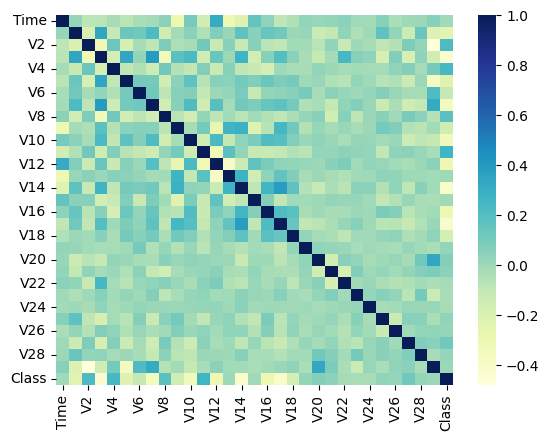

In [ ]:
import seaborn as sns

sns.heatmap(Credit_card_data.corr(), cmap="YlGnBu")
plt.show()

In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
12051,20878,-0.296534,0.338285,1.916803,-0.989423,-0.283434,0.401186,-0.235545,0.236264,2.167453,...,0.036976,0.602539,-0.106029,-0.331096,-0.513884,-0.701009,0.238170,0.158026,11.85,0.0
13877,24638,-1.455185,-0.519327,1.002094,1.229051,-0.340435,0.693755,1.950303,-0.094513,0.834540,...,0.104676,-0.144345,0.845142,-0.390235,0.345329,-0.389768,-0.057501,0.143657,449.00,0.0
575,430,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,...,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.00,0.0
1388,1077,-3.936794,-3.670519,-1.453820,2.299750,-9.749440,6.456410,10.784088,-2.160016,-0.238116,...,-0.979104,0.957186,2.441960,0.250607,0.300908,1.157867,1.624284,-1.638647,2452.03,0.0
24682,33329,-0.770944,0.297715,2.351936,0.380100,-0.642350,0.428577,-0.192913,0.228454,-1.859283,...,-0.038638,0.368777,-0.135365,0.197196,0.112019,-0.078751,0.028145,0.082941,33.60,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
26802,34256,0.539276,1.554890,-2.066180,3.241617,0.184736,0.028330,-1.515521,0.537035,-1.999846,...,0.371773,0.111955,-0.305225,-1.053835,0.771175,0.240878,0.418435,0.232170,19.02,1.0
27362,34521,1.081234,0.416414,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,...,-0.159387,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559,1.52,1.0
27627,34634,0.333499,1.699873,-2.596561,3.643945,-0.585068,-0.654659,-2.275789,0.675229,-2.042416,...,0.469212,-0.144363,-0.317981,-0.769644,0.807855,0.228164,0.551002,0.305473,18.96,1.0
27738,34684,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,...,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,125.30,1.0
27749,34687,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,-3.908206,...,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195,19.02,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    492
1.0     93
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,19189.002033,-0.127887,0.055291,0.794163,0.133384,-0.232811,-0.000684,-0.091562,0.051984,0.435763,...,0.048965,-0.019506,-0.099588,-0.080612,0.031043,0.127452,0.004496,0.011440,0.00255,82.005305
1.0,18829.451613,-8.165086,6.134379,-11.690379,6.070066,-5.753486,-2.388962,-7.986805,4.121062,-2.922478,...,0.697894,0.549621,-0.372248,-0.340859,-0.260055,0.359772,0.179521,0.832824,0.10050,96.609677


In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

        Time        V1        V2        V3        V4        V5        V6  \
12051  20878 -0.296534  0.338285  1.916803 -0.989423 -0.283434  0.401186   
13877  24638 -1.455185 -0.519327  1.002094  1.229051 -0.340435  0.693755   
575      430 -1.860258 -0.629859  0.966570  0.844632  0.759983 -1.481173   
1388    1077 -3.936794 -3.670519 -1.453820  2.299750 -9.749440  6.456410   
24682  33329 -0.770944  0.297715  2.351936  0.380100 -0.642350  0.428577   
...      ...       ...       ...       ...       ...       ...       ...   
26802  34256  0.539276  1.554890 -2.066180  3.241617  0.184736  0.028330   
27362  34521  1.081234  0.416414  0.862919  2.520863 -0.005021  0.563341   
27627  34634  0.333499  1.699873 -2.596561  3.643945 -0.585068 -0.654659   
27738  34684 -2.439237  2.591458 -2.840126  1.286244 -1.777016 -1.436139   
27749  34687 -0.860827  3.131790 -5.052968  5.420941 -2.494141 -1.811287   

              V7        V8        V9  ...       V20       V21       V22  \
12051  -0.23

In [ ]:
print(Y)

12051    0.0
13877    0.0
575      0.0
1388     0.0
24682    0.0
        ... 
26802    1.0
27362    1.0
27627    1.0
27738    1.0
27749    1.0
Name: Class, Length: 585, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(585, 30) (468, 30) (117, 30)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9893162393162394


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9743589743589743
